In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Introduction

Di Brazil, online shopping menjadi salah satu kebiasaan yang berkembang dengan cepat. Menurut Valor Capital Group, online seller di Brazil menghadapi beban operasional yang harus diintegrasikan secara manual pada berbagai marketplace sehingga Olist hadir untuk memecahkan masalah tersebut. Olist merupakan sebuah startup yang berdiri pada tahun 2015 dan berhasil menjadi unicorn pada tahun 2021 setelah mendapat investasi sebesar USD 186 juta (Valor Capital Group). Bila dilihat dari website Olist perusahaan ini memiliki 4 produk yang ditawarkan, salah satunya adalah Olist Store yang bergerak di bidang e-commerce dan menjadi subjek yang akan dibahas. Dilansir dari website PitchBook, platform Olist menghubungkan pengusaha dengan online seller dan memberi akses kepada penjual untuk mengiklankan dan menjual di marketplaces tanpa masalah, serta memungkinkan perusahaan retail untuk menjangkau marketplaces internasional.

Olist menyediakan layanan operasional menyeluruh kepada merchants dengan mengelola katalog produk, inventaris, harga, fulfillment, layanan customer, dan pembayaran dalam satu tempat. Penjual hanya perlu menginput produk-produk yang akan dijual sekali saja pada Olist Store yang kemudian akan diintegrasikan oleh Olist ke berbagai e-commerce lain.

Berdasarkan website Similarweb Olist Store (salah satu produk Olist) berada pada peringkat 43 untuk kategori e-commerce di Brazil. Pada dasarnya masyarakat akan lebih mengenal nama-nama perusahaan yang masuk kategori kelas atas. Mengingat Olist Store ada di peringkat 43, Olist Store perlu "merangkak" naik supaya masyarakat bisa mengenal Olist Store lebih dalam. Peringkat tersebut juga tergolong rendah untuk perusahaan sekelas Olist yang sudah mendapat status sebagai unicorn. Menurut Think With Google, masyarakat di Brazil menjadikan free shipping, discounts and promotions, dan lower prices sebagai tiga elemen utama yang memengaruhi keputusan berbelanja mereka. Namun, juga terdapat masyarakat yang tidak terlalu memedulikan ketiga elemen tersebut sebagai pertimbangan ketika berbelanja. Oleh karena itu, Olist Store membutuhkan segmentasi pasar berdasarkan ketiga elemen tersebut sehingga marketing akan lebih tepat sasaran dan akan lebih banyak customer yang melakukan transaksi di Olist Store. Hal ini diharapkan dapat membantu Olist Store mendapatkan peringkat yang lebih baik dan lebih banyak masyakarat yang berbelanja di Olist store. Semakin banyak pembeli, maka profit yang akan didapat Olist Store akan semakin tinggi.

### Data Understanding
### Data Info

Data ini dibuat oleh Olist dan berisikan informasi customer, seller, product, order, review, dan geolocation dari Olist Store di Brazil mulai tahun 2016 hingga 2018

### Data Source

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv

### 2.1 Customers Dataset
Dataset ini memiliki informasi mengenai customers dan lokasinya. Dataset ini digunakan untuk mengidentifikasi unique customers pada dataset orders dan untuk mendapatkan orders delivery location-nya.

Pada sistem kami, masing-masing order memiliki unique customer ID. Ini artinya customer yang sama akan mendapatkan ID yang berbeda untuk setiap order yang dibuat. Tujuan dari adanya customer_unique_id adalah untuk mengidentifikasi customer yang melakukan pembelanjaan berulang-ulang. Bila tidak ada, setiap order seperti dilakukan oleh pembeli yang berbeda-beda.

In [4]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### 2.2 Geolocation Dataset
Dataset ini memiliki informasi mengenai kodepos di Brazil beserta koordinat latitude dan longitude-nya. Dataset ini digunakan untuk mem-plot peta dan menemukan jarak antara penjual dan pembeli.

In [6]:
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### 2.3 Order Items Dataset
Dataset ini memiliki informasi mengenai items yang dibeli dalam setiap pesanan.

Contoh:

order_id 00143d0f86d6fbd9f9b38ab440ac16f5 memiliki 3 items (produk yang sama). Setiap item memiliki ongkos kirim yang dihitung berdasarkan dimensi dan beratnya. Untuk mendapatkan total ongkos kirim dari setiap order hanya perlu dijumlahkan.

Nilai total order_item: 21.33 * 3 = 63.99

Nilai total ongkos kirim: 15.10 * 3 = 45.30

Nilai total order (produk + ongkos kirim): 45.30 + 63.99 = 109.29

In [8]:
df_orderitems = pd.read_csv("olist_order_items_dataset.csv")
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
df_orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### 2.4 Order Payment Dataset
Dataset ini memiliki informasi mengenai metode pembayaran.

In [10]:
df_orderpayments = pd.read_csv("olist_order_payments_dataset.csv")
df_orderpayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
df_orderpayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### 2.5 Order Reviews Dataset
Dataset ini memiliki informasi mengenai review yang dibuat oleh customer.

Setelah customer membeli produk dari Olist Store, penjual mendapatkan notifikasi untuk memenuhi order tersebut. Setelah customer menerima produk, atau tanggal estimasi pengiriman telah lewat, customer akan menerima survey kepuasan melalui email dimana mereka dapat memberikan catatan dan komentar mengenai pengalaman berbelanjanya.

In [12]:
df_orderreviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orderreviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
df_orderreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### 2.6 Orders Dataset
Dataset ini merupakan dataset utama. Dataset ini memiliki informasi mengenai masing-masing order.

In [15]:
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### 2.7 Products Dataset
Dataset ini memiliki informasi mengenai data produk yang dijual di Olist Store.

In [17]:
df_products = pd.read_csv("olist_products_dataset.csv")
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### 2.8 Sellers Dataset
Dataset ini memiliki informasi mengenai penjual yang menyelesaikan order yang dibuat di Olist Store. Dengan dataset ini kita dapat menemukan lokasi penjual dan mengidentifikasi penjual mana yang memenuhi pembelian.

In [19]:
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### 2.9 Product Category Name Translation Dataset
Dataset ini memiliki informasi mengenai terjemahan product_category_name dari bahasa portugis ke bahasa inggris.

In [22]:
df_product_category_name = pd.read_csv("product_category_name_translation.csv")
df_product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [23]:
df_product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### 2.10 Data Schema
Data ini terbagi menjadi 9 dataset. hubungan antar dataset dapat dilihat pada gambar schema berikut.

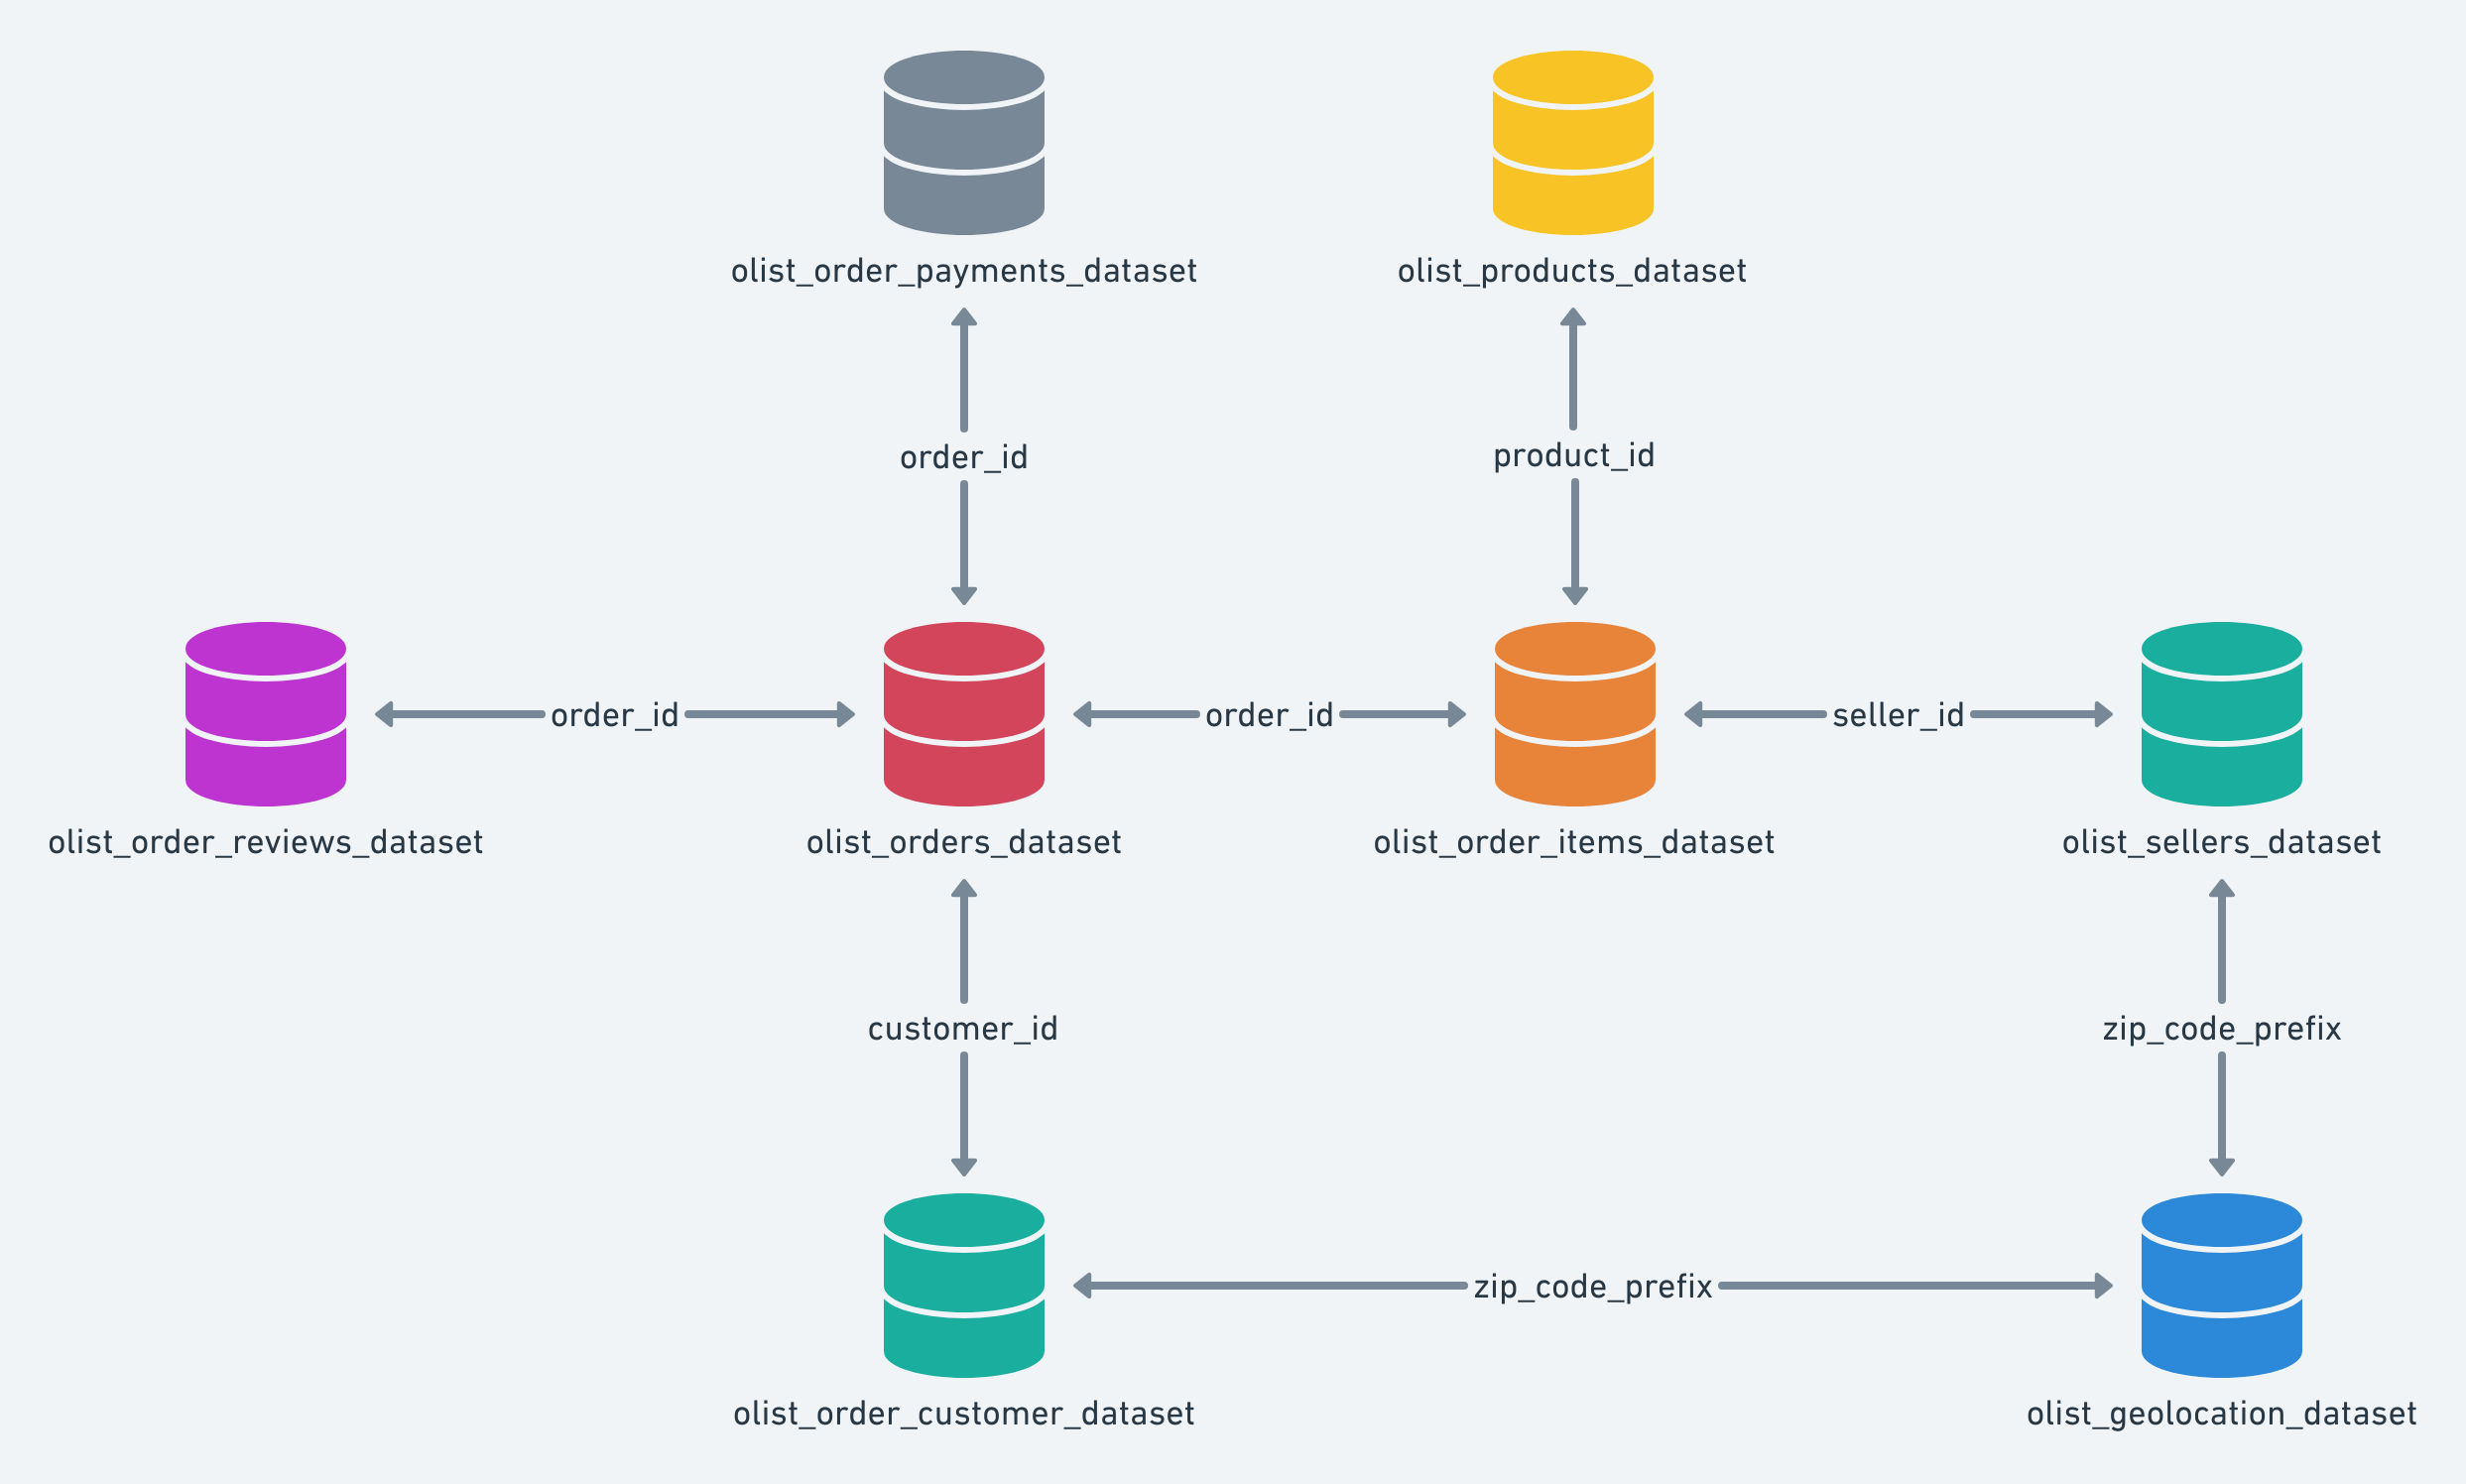

### 3. EDA (Explanatory Data Analysis) & Data Preprocessing

### 3.1 Duplicate Data

#### 3.1.1 Check Duplicate Data

#### df_customers

In [24]:
df_customers.duplicated().sum()

0

Tidak ada data yang duplikat dari df1_customers.

#### df_geolocation

In [26]:
df_geolocation.duplicated().sum()

261831

Terdapat banyak data duplikat dari df_geolocation. Hal ini disebabkan karena dalam satu zip code terdapat banyak user yang melakukan transaksi.

#### df_orderitems

In [27]:
df_orderitems.duplicated().sum()

0

Tidak ada data yang duplikat dari df_orderitems.

#### df4_orderpayment

In [28]:
df_orderpayments.duplicated().sum()

0

Tidak ada data yang duplikat dari df_orderpayment.

#### df_orderreviews

In [29]:
df_orderreviews.duplicated().sum()

0

Tidak ada data yang duplikat dari df_orderreviews.

#### df_orders

In [30]:
df_orders.duplicated().sum()

0

Tidak ada data yang duplikat dari df_orders.

#### df_products

In [31]:
df_products.duplicated().sum()

0

Tidak ada data yang duplikat dari df_products.

#### df_sellers

In [32]:
df_sellers.duplicated().sum()

0

Tidak ada data yang duplikat dari df8_sellers.

### 3.1.2 Handling Duplicate Data
Dilihat dari tiap tabel yang sudah dicek di atas, hanya tabel df_geolocation yang memiliki data duplikat. Dari penjelasan yang ada pada tabel df_geolocation, tidak perlu meng-handling data yang duplikat.

### 3.2 Missing Value

### 3.2.1 Check Missing Value

#### df_customers

In [40]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada missing value dari df_customers.

#### df_geolocation

In [41]:
df_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Tidak ada missing value dari df2_geolocation.

#### df_orderitems

In [42]:
df_orderitems.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada missing value dari df_orderitems.

#### df_orderpayments

In [35]:
df_orderpayments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak ada missing value dari df_orderpayments.

#### df_orderreviews

In [36]:
df_orderreviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat 87,656 missing value pada kolom review_comment_title dan 58,247 missing value pada kolom review_comment_message.

#### df_orders

In [37]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat 160 missing value pada kolom order_approved_at, 1783 missing value pada kolom order_delivered_carrier_date, dan 2965 missing value pada kolom order_delivered_customer_date.

#### df_products

In [38]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Seluruh kolom kecuali kolom product_id pada df7_products memiliki missing value.

#### df_sellers

In [47]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak ada missing value dari df_sellers.

### 3.2.2 Handling Missing Value

Dilihat dari tiap tabel yang sudah dicek di atas, terdapat 3 tabel yang memiliki missing value yaitu tabel df_orderreviews, df_orders, dan df_products.

#### df_orderreviews

Pada tabel df5_orderreviews tidak perlu di-handling karena customer bisa saja tidak memberikan review comment walaupun sudah memberikan review score dari produk yang sudah dibeli.

#### df_orders

Pada tabel df_orders tidak perlu di-handling dengan alasan berikut.

1. Processing : Status setelah customer melakukan order sehingga kolom order_delivered_carrier_date dan kolom order_delivered_customer_date pasti kosong (NaN).
2. Unavailable : Status ketika penjual menyatakan stock produk tidak tersedia setelah customer melakukan order sehingga kolom order_delivered_carrier_date dan kolom order_delivered_customer_date pasti kosong (NaN).
3. Approved : Status ketika order disetujui oleh penjual sehingga kolom order_delivered_carrier_date dan kolom order_delivered_customer_date pasti kosong (NaN).
4. Invoiced : Status ketika order sudah dibayar oleh customer sehingga kolom order_delivered_carrier_date dan kolom order_delivered_customer_date pasti kosong (NaN).
5. Shipped : Status ketika produk sedang dikirimkan oleh penjual ke customer sehingga kolom order_delivered_customer_date pasti kosong (NaN).
6. Delivered : Status ketika produk sudah sampai pada customer.
7. Canceled : Status ketika customer membatalkan order, pembatalan memungkinkan terjadi pada setiap Order Status (kecuali Delivered) sehingga kolom yang kosong bisa terjadi pada kombinasi kolom order_approved_timestamp, order_delivered_carrier_date, dan order_delivered_customer_date.

#### df_products

Pada tabel df_products missing data akan dibiarkan kecuali pada kolom product_category_name, karena nanti kami akan membutuhkan jenis barang apa saja yang dibeli masing-masing segmentasi customer.

In [41]:
df_products['product_category_name'] = df_products['product_category_name'].fillna('miscellaneous')

Setelah memasukkan kategori baru (miscellaneous), kami juga harus menambahkan terjemahan kategori tersebut pada df_product_category_name sehingga ketika diterjemahkan tidak akan ada masalah.

In [42]:
df_product_category_name.loc['71'] = ['miscellaneous', 'miscellaneous']

#### Merge All Data Frame

Akan menggabungkan seluruh data frame menjadi satu data frame. Sebelum digabung, masih ada satu data frame yang belum siap digabung pada data frame df_products. Data frame tersebut masih menggunakan bahasa Brazil (Portugal) sehingga kami perlu menerjemahkan bahasa tersebut menggunakan data frame df_product_category_name yang sudah disediakan.

In [43]:
# Menerjemahkan kategori barang dari bahasa portugal menjadi bahasa inggris

df_productss = pd.merge(df_products, df_product_category_name, how= "left", on= "product_category_name")
df_productss['product_category_name'] = df_productss['product_category_name_english']
df_productss.drop(columns = 'product_category_name_english', inplace = True)
df_productss.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [45]:
df_productss.isnull().sum()

product_id                      0
product_category_name          13
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Setelah diterjemahkan, ternyata terdapat 13 data yang memiliki nilai NaN, akan mengecek ke-13 data tersebut.

In [46]:
df_productss[df_productss['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1628,0105b5323d24fc655f73052694dbbb3a,NaN,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
5821,6fd83eb3e0799b775e4f946bd66657c0,NaN,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
7325,5d923ead886c44b86845f69e50520c3e,NaN,58.0,284.0,1.0,1200.0,25.0,33.0,25.0
7478,6727051471a0fc4a0e7737b57bff2549,NaN,60.0,1532.0,3.0,650.0,16.0,22.0,20.0
8819,bed164d9d628cf0593003389c535c6e0,NaN,54.0,382.0,2.0,850.0,30.0,21.0,22.0
11039,1220978a08a6b29a202bc015b18250e9,NaN,46.0,280.0,1.0,1200.0,25.0,33.0,25.0
14266,ae62bb0f95af63d64eae5f93dddea8d3,NaN,59.0,927.0,1.0,10600.0,40.0,20.0,38.0
16182,1954739d84629e7323a4295812a3e0ec,NaN,58.0,792.0,4.0,750.0,30.0,30.0,30.0
16930,dbe520fb381ad695a7e1f2807d20c765,NaN,60.0,840.0,6.0,800.0,18.0,22.0,22.0
17800,c7a3f1a7f9eef146cc499368b578b884,NaN,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0


Kami akan cek tiap product_id tersebut ke df_product_category_name apakah nama barang tersebut ada dalam bahasa portugal dan terjemahannya.

In [47]:
print(df_products[(df_products['product_id'] == '0105b5323d24fc655f73052694dbbb3a') 
                 | (df_products['product_id'] == '6fd83eb3e0799b775e4f946bd66657c0') 
                 | (df_products['product_id'] == '5d923ead886c44b86845f69e50520c3e')
                 | (df_products['product_id'] == '6727051471a0fc4a0e7737b57bff2549')
                 | (df_products['product_id'] == 'bed164d9d628cf0593003389c535c6e0')
                 | (df_products['product_id'] == '1220978a08a6b29a202bc015b18250e9')
                 | (df_products['product_id'] == 'ae62bb0f95af63d64eae5f93dddea8d3')
                 | (df_products['product_id'] == '1954739d84629e7323a4295812a3e0ec')
                 | (df_products['product_id'] == 'dbe520fb381ad695a7e1f2807d20c765')
                 | (df_products['product_id'] == 'c7a3f1a7f9eef146cc499368b578b884')
                 | (df_products['product_id'] == '7afdd65f79f63819ff5bee328843fa37')
                 | (df_products['product_id'] == 'a4756663d007b0cd1af865754d08d968')
                 | (df_products['product_id'] == 'cb9d764f38ee4d0c00af64d5c388f837')]['product_category_name'].unique())

['pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


Dari hasil di atas terdapat 2 kategori barang unique yaitu pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos. Selanjutnya akan dicek terjemahan dari kedua nama tersebut.

In [48]:
df_product_category_name[(df_product_category_name['product_category_name'] == 'pc_gamer') | (df_product_category_name['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos')]

,product_category_name,product_category_name_english


Dari hasil di atas tidak ada terjemahan untuk kedua kategori produk (pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos). Oleh karena itu kami akan menerjemahkan kedua nama tersebut di tabel df_product_category_name. Setelah menerjemahkan kedua kategori tadi, pc_gamer adalah pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos adalah kitchen_and_food_sets.

Sekarang kami akan masukkan terjemahan tersebut ke dalam df_product_category_name.

In [49]:
df_product_category_name.loc['72'] = ['pc_gamer', 'pc_gamer']
df_product_category_name.loc['73'] = ['portateis_cozinha_e_preparadores_de_alimentos', 'kitchen_and_food_sets']

In [50]:
df_productss = pd.merge(df_products, df_product_category_name, how= "left", on= "product_category_name")
df_productss['product_category_name'] = df_productss['product_category_name_english']
df_productss.drop(columns = 'product_category_name_english', inplace = True)
df_productss.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [53]:
df_productss.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [54]:
data = df_orders.merge(df_customers, on="customer_id").merge(df_orderitems, on="order_id").merge(df_productss, on="product_id").merge(df_orderpayments, on="order_id").merge(df_sellers, on="seller_id").merge(df_orderreviews, on="order_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   customer_unique_id             117329 non-null  object 
 9   customer_zip_code_prefix       117329 non-null  int64  
 10  customer_city                  117329 non-null  object 
 11  customer_state                 117329 non-null  object 
 12  order_item_id                 

In [55]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                1695
product_description_lenght         1695
product_photos_qty                 1695
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20


Walaupun terjadi peningkatan missing value pada kolom Product_Name_Length, product_description_length, product_photos_qty, product_weight_gr, product_length_cm, product_height_cm, dan product_didth_cm, missing value tersebut tidak mempengaruhi analisis yang akan dibuat sehingga kami tetap biarkan.

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   customer_unique_id             117329 non-null  object 
 9   customer_zip_code_prefix       117329 non-null  int64  
 10  customer_city                  117329 non-null  object 
 11  customer_state                 117329 non-null  object 
 12  order_item_id                 

### 4. Data Analysis

In [56]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_purchase_date'] = data['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
data['order_purchase_date'] = pd.to_datetime(data['order_purchase_date'])

In [57]:
data['year'] = data['order_purchase_date'].dt.year
data['month'] = data['order_purchase_date'].dt.strftime('%b')
data['day'] = data['order_purchase_date'].dt.day
data.groupby(data['order_purchase_timestamp'].dt.to_period('M')).count()['order_id']

order_purchase_timestamp
2016-09       3
2016-10     379
2016-12       1
2017-01    1011
2017-02    2058
2017-03    3174
2017-04    2841
2017-05    4404
2017-06    3794
2017-07    4848
2017-08    5163
2017-09    5096
2017-10    5564
2017-11    9014
2017-12    6521
2018-01    8523
2018-02    7944
2018-03    8518
2018-04    8202
2018-05    8181
2018-06    7355
2018-07    7300
2018-08    7434
2018-09       1
Freq: M, Name: order_id, dtype: int64

Penggunaan data kami batasi dari Januari 2017 sampai Agustus 2018 karena kurangnya data di luar batas tersebut.

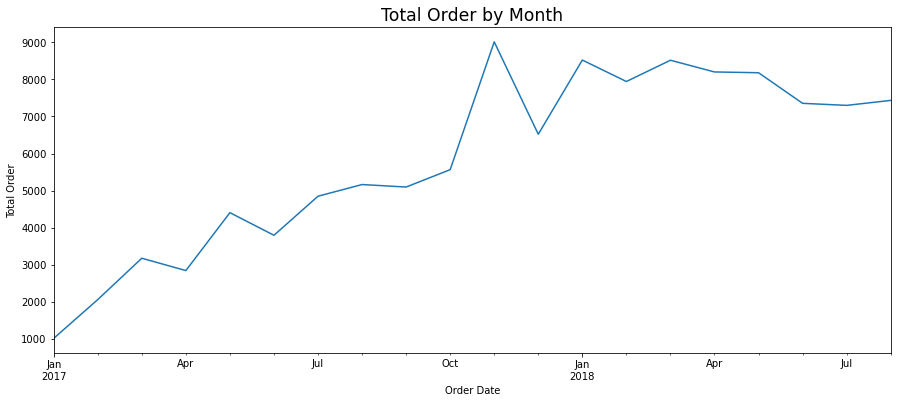

In [58]:
data2 = data.drop(data[((data['month'] == 'Sep')) & (data['year'] == 2018)].index)
data2 = data2.drop(data2[data2['year'] == 2016].index)
data2['order_purchase_timestamp'] = pd.to_datetime(data2['order_purchase_timestamp'])
data2.groupby(data2['order_purchase_timestamp'].dt.to_period('M')).count()['order_id'].plot(figsize=(15,6))
plt.title('Total Order by Month', size = 'xx-large')
plt.xlabel('Order Date')
plt.ylabel('Total Order')
plt.show()

Sejak Januari 2017, jumlah order terus meningkat sampai puncaknya terjadi pada November 2017. Hal ini dikarenakan masyarakat Brazil merayakan Thanksgiving dan Black Friday. Ketika Black Friday masyarakat yang merayakan Natal akan membeli barang untuk persiapan dan kado Natal. Pada Desember 2017 jumlah transaksi menurun karena masyarakat tidak lagi banyak melakukan transaksi sebab sudah dilakukan pada Black Friday. Namun setelah itu jumlah order mengalami sideways (jumlah order tidak naik maupun turun). Selanjutnya kami akan coba lihat berdasarkan review score.

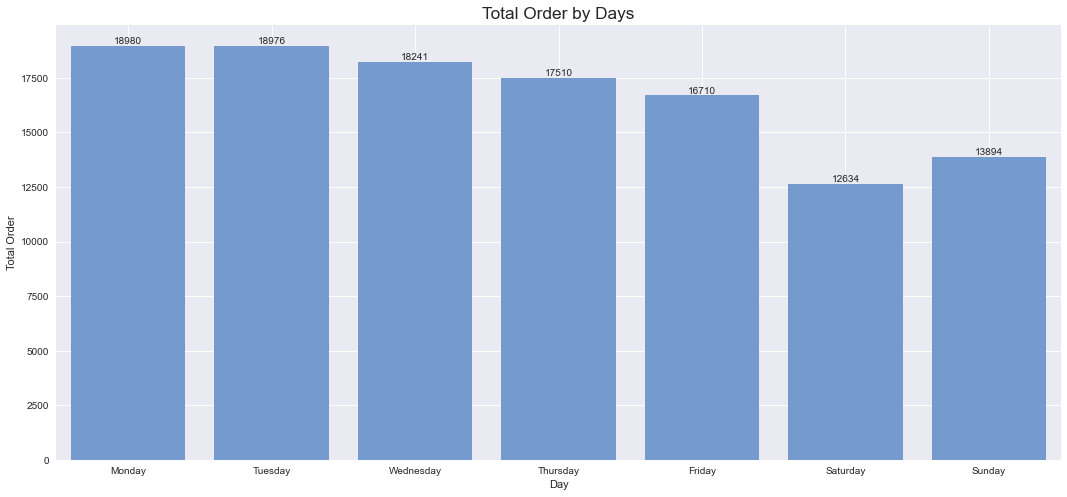

In [65]:
data2['order_purchase_day'] = data2['order_purchase_timestamp'].dt.day_name()
data2['order_purchase_day'] = pd.Categorical(data2['order_purchase_day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
reOrder_days = data2['order_purchase_day'].value_counts()
reOrder_days = reOrder_days.sort_index()
reOrder_days = data2['order_purchase_day'].value_counts().reset_index()
reOrder_days.columns = ['order_purchase_day', 'count']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = reOrder_days['order_purchase_day'].map(mapping)
reOrder_days

plt.style.use('seaborn')
plt.figure(figsize = (18, 8))
plt.title('Total Order by Days', size = 'xx-large')
ax = sns.barplot(x='order_purchase_day', y='count',
                 data=reOrder_days,
                 errwidth=0, color='#69d'
                 )
ax.bar_label(ax.containers[0])
plt.xlabel('Day')
plt.ylabel('Total Order')
plt.grid(True)
plt.show()

Dari plot di atas terlihat jumlah order ketika weekend mengalami penurunan. Salah satu penyebab masyarakat tidak berbelanja di online store karena tidak semua toko menjalankan operasional pada weekend. Selain itu masyarakat lebih memilih aktivitas di luar belanja pada weekend untuk melepas penat dari keseharian bekerja saat weekdays. Jika memang ingin berbelanja pada saat weekend, masyarakat tentu akan lebih memilih ke offline store karena salah satu kelebihan dari offline store adalah dapat membandingkan kualitas barang secara langsung. Pergi ke offline store dapat menjadi salah satu kesempatan untuk berkumpul bersama keluarga dan/atau teman.

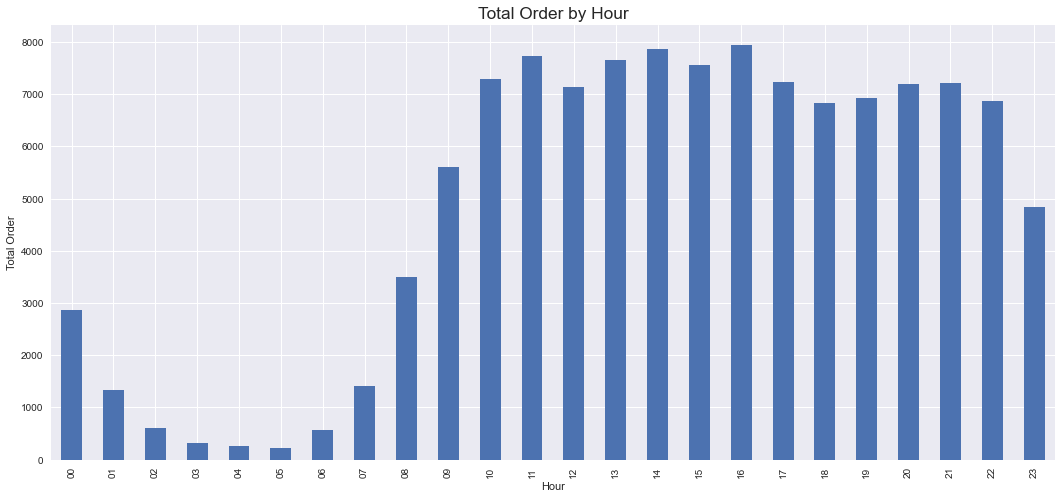

In [66]:
plt.figure(figsize=(18,8))
data2['order_purchase_hour'] = data2['order_purchase_timestamp'].dt.strftime('%H')
data2.groupby('order_purchase_hour')['order_purchase_hour'].count().plot(kind = 'bar')
plt.title('Total Order by Hour', size = 'xx-large')
plt.xlabel('Hour')
plt.ylabel('Total Order')
plt.show()

Dari plot di atas terlihat order banyak terjadi dari pukul 10 pagi sampai dengan pukul 22 malam.

#### Delivery Analysis

In [60]:
data2['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data2['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data2['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data2['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data2['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
df_deliv_gap = data2[['order_id','order_status','order_purchase_timestamp']].copy()
df_deliv_gap['seller_cfmed'] = round((data2['order_approved_at'] - data2['order_purchase_timestamp'])/np.timedelta64(1, 'h'),2)
df_deliv_gap['seller_to_carrier'] = round((data2['order_delivered_carrier_date'] - data2['order_approved_at'])/np.timedelta64(1, 'h'),2)
df_deliv_gap['carrier_to_buyer'] = round((data2['order_delivered_customer_date'] - data2['order_delivered_carrier_date'])/np.timedelta64(1, 'h'),2)
df_deliv_gap['cfmed_to_carrier'] = round((data2['order_delivered_carrier_date'] - data2['order_purchase_timestamp'])/np.timedelta64(1, 'h'),2)
df_deliv_gap['month_year'] = df_deliv_gap['order_purchase_timestamp'].dt.to_period('M')

df_deliv_gap['seller_to_carrier_day'] = df_deliv_gap['seller_to_carrier']/24
df_deliv_gap['carrier_to_buyer_day'] = df_deliv_gap['carrier_to_buyer']/24

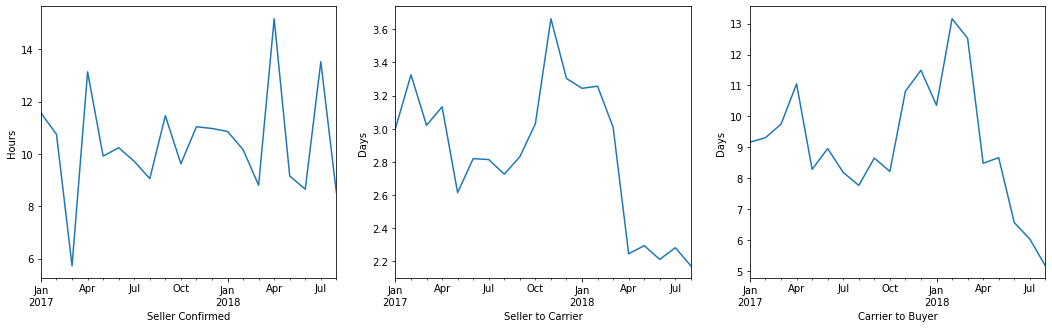

In [61]:
plt.figure(figsize=(18,5))
plt.subplot(131)
df_deliv_gap.groupby('month_year').mean()['seller_cfmed'].plot(xlabel = 'Seller Confirmed',ylabel='Hours')
plt.subplot(132)
df_deliv_gap.groupby('month_year').mean()['seller_to_carrier_day'].plot(xlabel = 'Seller to Carrier', ylabel='Days')
plt.subplot(133)
df_deliv_gap.groupby('month_year').mean()['carrier_to_buyer_day'].plot(xlabel = 'Carrier to Buyer', ylabel='Days')
plt.show()

Sebelumnya telah ditunjukkan bahwa terjadi peningkatan pembelian pada bulan November 2017. Jika dilihat dari plot Seller Confirmed waktu yang dibutuhkan seller untuk mengonfirmasi pesanan adalah kurang dari satu hari. Hal ini menandakan jumlah pesanan tidak memengaruhi seller dalam mengonfirmasi pesanan.

Sedangkan pada plot Seller to Carrier waktu yang dibutuhkan seller dari pesanan dikonfirmasi hingga kurir berangkat meningkat ketika jumlah pesanan meningkat. Hal ini terjadi karena baik seller maupun kurir memiliki kuota minimal untuk memberangkatkan pesanan. Rata-rata waktu yang dibutuhkan juga terlalu lama karena customer harus menunggu kurang lebih tiga hari setelah seller mengonfirmasi pesanan. Jumlah order setelah bulan Maret 2018 yang mengalami sideways bisa jadi disebabkan oleh berkurangnya kepercayaan customer kepada Olist Store. Namun, pada bulan April 2018 lama waktu yang dibutuhkan terlihat menurun, hal ini bisa saja disebabkan karena baik seller maupun kurir sudah dapat beradaptasi dengan jumlah order yang tinggi. Hal yang sama juga terjadi untuk plot Carrier to Buyer lamanya waktu pengiriman meningkat ketika jumlah pesanan meningkat. Dari plot terlihat bahwa rata-rata lama proses pengiriman ke customer memakan waktu lebih dari seminggu. Oleh karena itu, dapat disimpulkan keterlambatan disebabkan oleh kurir.

Ketiga plot di atas membuktikan bahwa memang terjadi masalah dalam pengiriman barang di Olist Store sesuai dengan banyaknya kata yang muncul pada review yang bernilai 1 dan 2. Masalah ini juga menjadi salah satu alasan mengapa jumlah order mengalami sideways setelah bulan November 2017. Namun, pada bulan April 2018 lama waktu yang dibutuhkan terlihat menurun tetapi jumlah order tidak menurun (sideways), hal ini bisa saja disebabkan karena baik seller maupun kurir sudah dapat beradaptasi dengan jumlah order yang tinggi, tetapi customer telah berkurang kepercayaannya.